<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

### Import libraries

This notebook was run and tested on Keras version 2.3.1 and Tensorflow 2.2.0. 

In [15]:
# Check keras and tensorflow versions

import sys
import tensorflow as tf
from tensorflow import keras

print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)

Keras version:  2.5.0
Tensorflow version:  2.5.0


In [17]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(f'Built with cuda: {tf.test.is_built_with_cuda()}')
print(f'Tensorflow Version: {tf.__version__}')
print(f'Python: {sys.version}')

Num GPUs Available:  1
Built with cuda: True
Tensorflow Version: 2.5.0
Python: 3.9.0 (default, Nov 15 2020, 08:30:55) [MSC v.1916 64 bit (AMD64)]


In [2]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Load data

In [3]:
# The diabetes dataset
diabetes = load_diabetes()

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Prepare input data

In [5]:
# input
X = diabetes.data

# print the type of X to check that it is a numpy array
print("X is a ", type(X))

# Print shape to check rows and columns
print("X has {} rows and {} columns".format(X.shape[0], X.shape[1]))

# Save number of columns as n_cols
n_cols = X.shape[1]

# output
y = diabetes.target

print("First 10 values in y: ", y[:10])

X is a  <class 'numpy.ndarray'>
X has 442 rows and 10 columns
First 10 values in y:  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [6]:
# How many observations are in y?
len(y)

442

### Split the data (training/test)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [8]:
# Set up the model architecture
model = Sequential()

In [9]:
# Add the first hidden layer
model.add(Dense(15, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(5, activation = 'relu'))
# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                165       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [11]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [12]:
# shuffle training data
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

In [13]:
%%time
# Fit the model
history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 1000,
    verbose = 0)

Wall time: 1min 56s


### Create predictions

In [14]:
predictions = model.predict(X_test)

### Evaluate the model

In [18]:
# Calculate test MSE
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])

5/5 [==============================] - 0s 5ms/step - loss: 3316.9761 - mse: 3316.9761

Test loss: 3316.976074


In [19]:
score

[3316.97607421875, 3316.97607421875]

In [20]:
# Find RMSE
score[0] ** (1/2)

57.59319468668803

In [21]:
y.mean()

152.13348416289594

In [22]:
y.std()

77.00574586945044

In [23]:
y.min()

25.0

In [24]:
y.max()

346.0

### Visualisation of cost

In [25]:
history.history

{'loss': [28753.73828125,
  28741.5625,
  28731.779296875,
  28721.091796875,
  28708.267578125,
  28692.556640625,
  28672.05859375,
  28645.05859375,
  28609.78515625,
  28564.0625,
  28506.146484375,
  28435.515625,
  28348.681640625,
  28244.359375,
  28119.974609375,
  27974.46484375,
  27806.052734375,
  27603.79296875,
  27373.65234375,
  27111.998046875,
  26812.126953125,
  26476.255859375,
  26101.15234375,
  25687.951171875,
  25242.416015625,
  24764.8203125,
  24252.765625,
  23706.3984375,
  23154.3671875,
  22564.041015625,
  21957.638671875,
  21332.955078125,
  20691.8125,
  20015.7265625,
  19330.541015625,
  18647.10546875,
  17944.26171875,
  17236.955078125,
  16524.43359375,
  15802.87890625,
  15043.8623046875,
  14333.107421875,
  13635.9970703125,
  12950.78125,
  12305.552734375,
  11633.11328125,
  11015.697265625,
  10417.15625,
  9838.22265625,
  9338.814453125,
  8861.6630859375,
  8401.986328125,
  7966.01123046875,
  7578.24560546875,
  7230.32373046875,

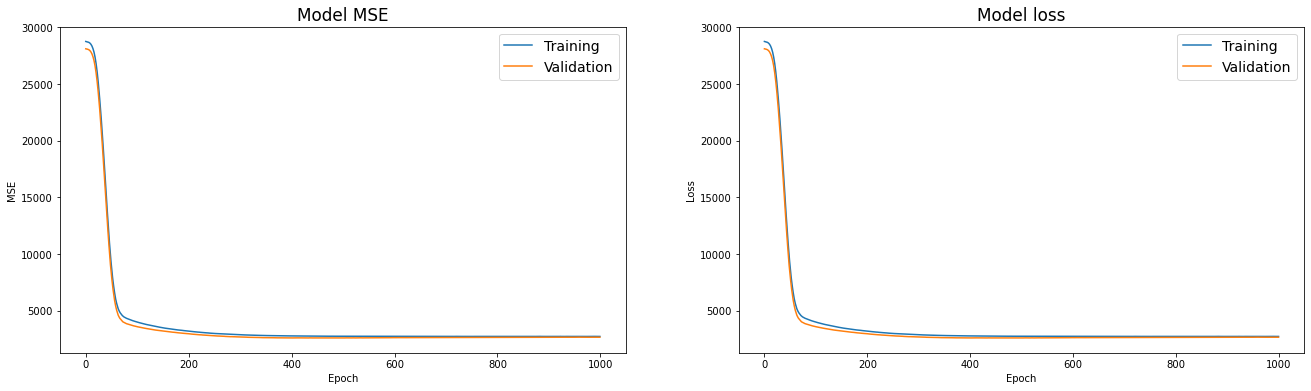

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [27]:
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

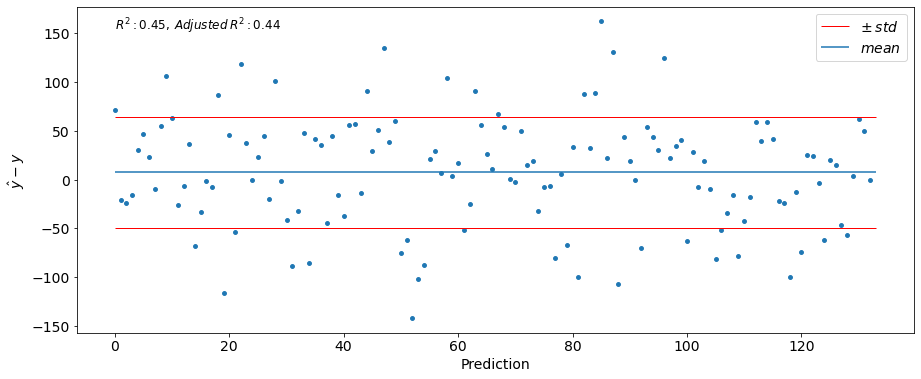

In [28]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



